In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
df = pd.read_csv(r'C:\Users\Administrator\Downloads\50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [27]:
df=df.copy()
df=df.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
df.head()

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: xlabel='state'>

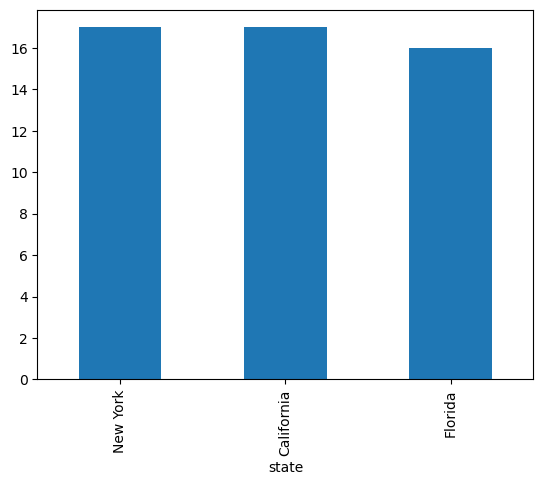

In [28]:
df['state'].value_counts().plot.bar()

In [66]:
startup = df.drop('State', axis = 1)
startup.head(7)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51


In [18]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [35]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RnD        50 non-null     float64
 1   admin      50 non-null     float64
 2   marketing  50 non-null     float64
 3   profit     50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [36]:
startup.columns

Index(['RnD', 'admin', 'marketing', 'profit'], dtype='object')

In [37]:
startup.isnull().sum()

RnD          0
admin        0
marketing    0
profit       0
dtype: int64

In [38]:
startup[df.values==0.0]

,RnD,admin,marketing,profit
19,86419.70,153514.11,0.00,122776.86
47,0.00,135426.92,0.00,42559.73
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


<Axes: >

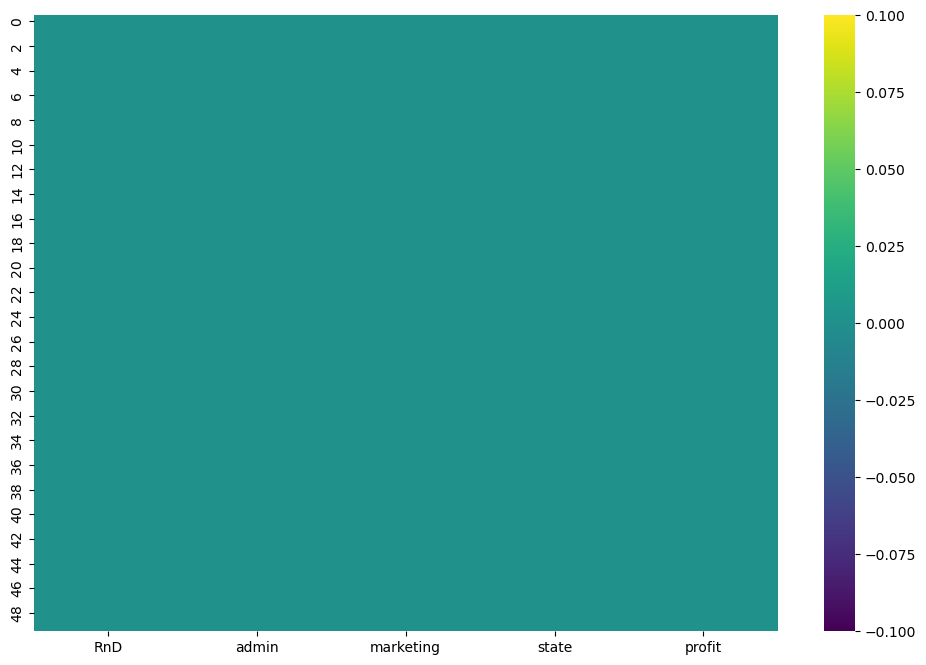

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [40]:
startup[startup.duplicated()].shape

(0, 4)

In [41]:
startup.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [42]:
startup[startup.duplicated()]

,RnD,admin,marketing,profit


In [43]:
startup.describe()

,RnD,admin,marketing,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [44]:
startup.shape

(50, 4)

<Axes: xlabel='Profit', ylabel='Density'>

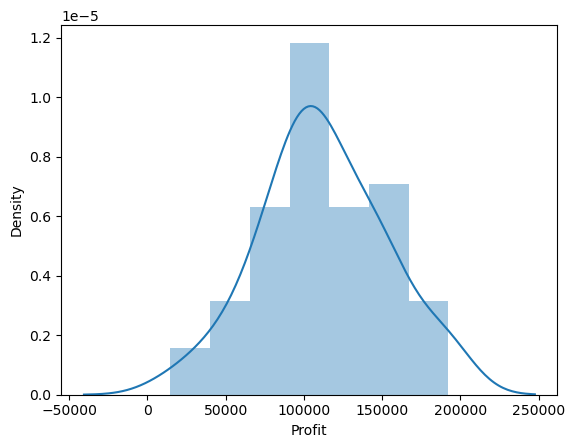

In [9]:
sns.distplot(df['Profit'])

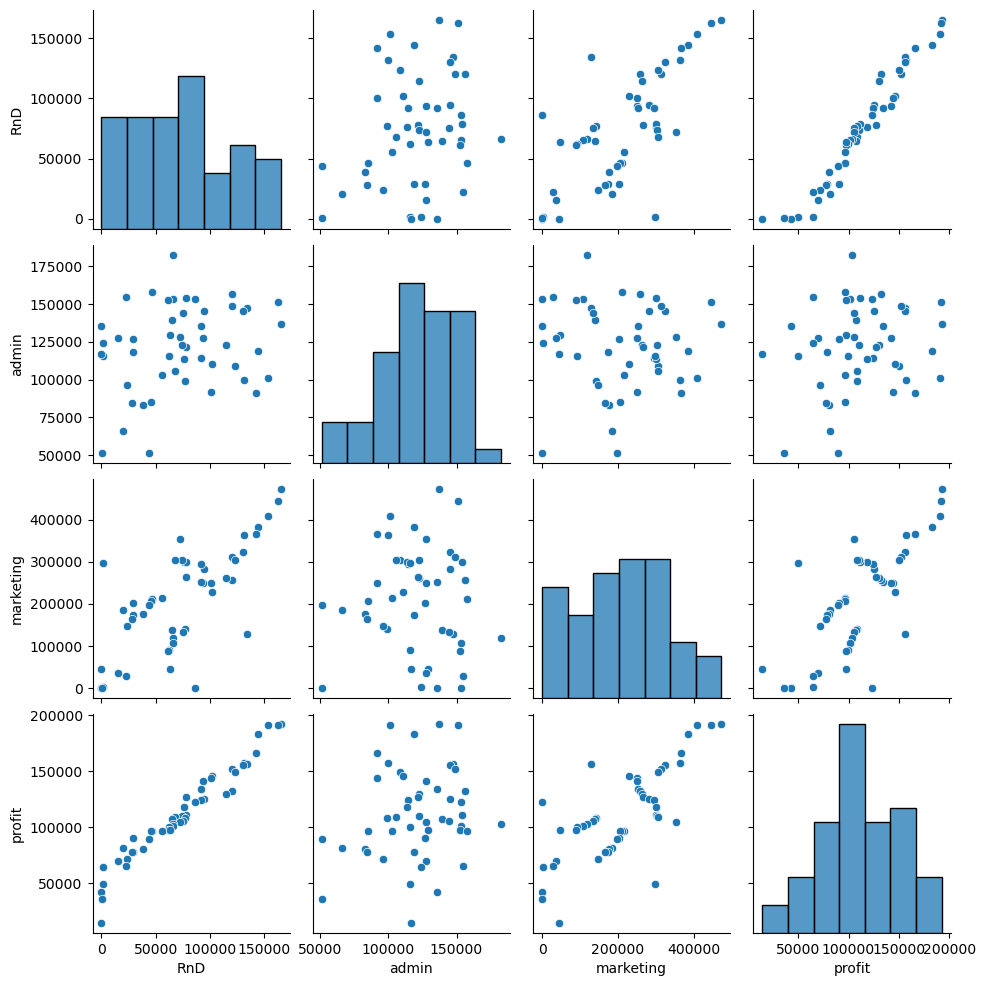

In [45]:
sns.pairplot(startup)

<Axes: >

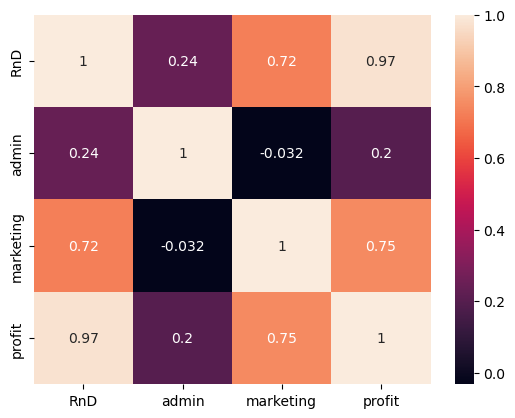

In [46]:
sns.heatmap(startup.corr(), annot=True)

In [68]:
import statsmodels.formula.api as slr

In [182]:
X = startup[['R&D Spend','Administration', 'Marketing Spend']]
Y = startup[['Profit']]

In [159]:
model = smf.OLS(Y, X).fit()
predictions = model.predict(X)

In [160]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1232.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):                    1.17e-44
Time:                        17:37:03   Log-Likelihood:                         -545.82
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      47   BIC:                                      1103.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7180      0.065     11.047      0.000       0.587       0.849
Administration      0.3277      0.031     10.458      0.000       0.265       0.391
Marketing Spend     0.0822      0.022      3.733      0.001       0.038       0.126
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                          -0.126   Prob(JB):                        0.688
Kurtosis:                       2.456   Cond. No.                         9.76
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
vif = pd.DataFrame()

In [179]:
vif["features"] = X.columns
vif

,features
0,R&D Spend
1,Administration
2,Marketing Spend


In [185]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [192]:
vif.round(1)

,features,VIF Factor
0,R&D Spend,8.4
1,Administration,4.0
2,Marketing Spend,7.6


In [210]:
X1 = startup[['R&D Spend', 'Marketing Spend']]

In [212]:
new_model = smf.OLS(Y, X1).fit()
new_predictions = new_model.predict(X1)

In [213]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              550.4
Date:                Thu, 28 Dec 2023   Prob (F-statistic):                    8.02e-34
Time:                        18:19:13   Log-Likelihood:                         -575.87
No. Observations:                  50   AIC:                                      1156.
Df Residuals:                      48   BIC:                                      1160.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.9781      0.108      9.026      0.000       0.760       1.196
Marketing Spend     0.1375      0.039      3.563      0.001       0.060       0.215
==============================================================================
Omnibus:                        0.664   Durbin-Watson:                   0.628
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.715
Skew:                          -0.043   Prob(JB):                        0.700
Kurtosis:                       2.420   Cond. No.                         8.35
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
X_sqrt = np.sqrt(startup[['R&D Spend', 'Marketing Spend']])

In [219]:
model3 = smf.OLS(Y, X_sqrt).fit()
predictions3 = model3.predict(X_sqrt)

In [221]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1744.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):                    1.53e-45
Time:                        18:33:36   Log-Likelihood:                         -547.76
No. Observations:                  50   AIC:                                      1100.
Df Residuals:                      48   BIC:                                      1103.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend         373.6034     24.904     15.002      0.000     323.531     423.675
Marketing Spend    37.7061     14.719      2.562      0.014       8.111      67.302
==============================================================================
Omnibus:                       20.934   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.656
Skew:                           1.399   Prob(JB):                     2.20e-07
Kurtosis:                       5.624   Cond. No.                         7.59
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
Y_sqrt = np.sqrt(startup['Profit'])

In [225]:
model4 = smf.OLS(Y_sqrt, X1).fit()
predictions4 = model4.predict(X1)

In [226]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              192.9
Date:                Thu, 28 Dec 2023   Prob (F-statistic):                    1.13e-23
Time:                        18:37:36   Log-Likelihood:                         -306.57
No. Observations:                  50   AIC:                                      617.1
Df Residuals:                      48   BIC:                                      621.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.0021      0.000      4.290      0.000       0.001       0.003
Marketing Spend     0.0006      0.000      3.187      0.003       0.000       0.001
==============================================================================
Omnibus:                        1.251   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                1.278
Skew:                          -0.322   Prob(JB):                        0.528
Kurtosis:                       2.555   Cond. No.                         8.35
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
model5 = smf.OLS(Y_sqrt, X_sqrt).fit()
predictions5 = model5.predict(X_sqrt)

In [230]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              614.2
Date:                Thu, 28 Dec 2023   Prob (F-statistic):                    6.40e-35
Time:                        18:38:19   Log-Likelihood:                         -279.59
No. Observations:                  50   AIC:                                      563.2
Df Residuals:                      48   BIC:                                      567.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.8425      0.117      7.222      0.000       0.608       1.077
Marketing Spend     0.2237      0.069      3.244      0.002       0.085       0.362
==============================================================================
Omnibus:                       19.033   Durbin-Watson:                   0.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.574
Skew:                           1.384   Prob(JB):                     4.61e-06
Kurtosis:                       5.032   Cond. No.                         7.59
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""